In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
%%html
<style> 
th{
    font-size: 14px;
    font-weight: bold;
}

td{
    font-size: 12px;
}
</style>

# La transformée de Fourier

## Introduction
Dans le chapitre sur les séries de Fourier, on a vu comment remplacer un signal périodique $x(t)$ par une somme d’harmoniques. Les harmoniques sont des sinusoïdes dont les fréquences sont des multiples entiers de la fréquence fondamentale du signal $x(t)$ ($\frac{1}{T}$ si $T$ est la période fondamentale de $x(t)$). La somme de ces harmoniques est nécessairement un signal périodique, de même période que $x(t)$. Lorsqu’on fait la somme de toutes les harmoniques (dans certains cas, une infinité), on obtient $x(t)$.

Alors, comment faire l’analyse spectrale du signal suivant, qui n’est pas périodique?

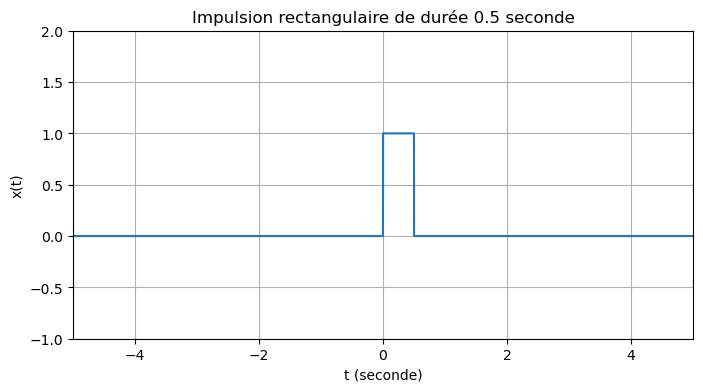

In [3]:
dt = 1/1000     # incrément temporel (élément différentiel)
t = np.arange(-5, 5, dt)     # échelle de temps

x = np.piecewise(t, [t < 0, (t > 0) & (t <= 0.5), t > 0.5], [0, 1, 0])    # signal d’entrée (version discrète)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(t,x)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Impulsion rectangulaire de durée 0.5 seconde")
ax1.grid()

Ce signal est nul jusqu’à $t=0$, il vaut ensuite 1 pour $0 < t < \frac{1}{2}$ seconde, puis il vaut à nouveau $0$ pour $t > \frac{1}{2}$. Clairement, ce signal n’est pas périodique. Peut-on alors quand même le remplacer par des sinusoïdes, comme dans le cas d’un signal périodique?

La réponse est : *oui!* La section suivante montre comment on y arrive.

## La limite des séries de Fourier

Comme on sait déjà calculer les composantes sinusoïdales (les harmoniques) d’un signal périodique, ce sera notre point de départ. En effet, nous allons « périodiser » le signal apériodique ci-haut, puis voir ce qui se passe lorsqu’on fait tendre sa période vers l’infini (suivez bien notre raisonnement…).

La figure suivante montre le signal obtenu en répétant périodiquement l’intervalle 0 < t < 1 du signal ci-haut :


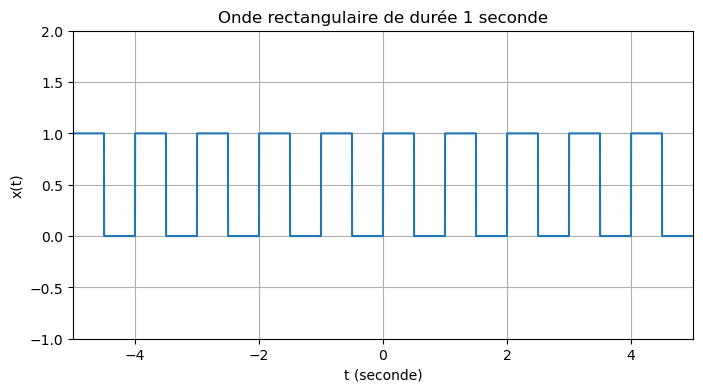

In [4]:
x2 = 0.5 * signal.square(2 * np.pi * t) +0.5

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(t,x2)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Onde rectangulaire de durée 1 seconde")
ax1.grid()

On sait faire l’analyse spectrale de ce signal. La période fondamentale est $T=1$ seconde. Les coefficients de Fourier $X(k)$ se trouvent (comme on l’a vu dans le chapitre sur les séries de Fourier) par l’équation :

$$
X(k)=\frac{1}{T} \int_{t=0}^{t=T} x(t) e^{-j k \omega_0 t} d t
$$

Le module des 10 premiers coefficients est montré dans la figure ci-dessous. On a mis, en abscisse, la fréquence $f$ (en Hz) des harmoniques (et non leur numéro $k$) afin de comparer entre elles les prochaines figures. Ainsi, l’axe des fréquences montre $f = k/T$. (ici, $T=1$, mais ce ne sera pas le cas dans les prochaines figures).


Text(0.5, 0, "k/T (Fréquence de l'harmonique - Hz)")

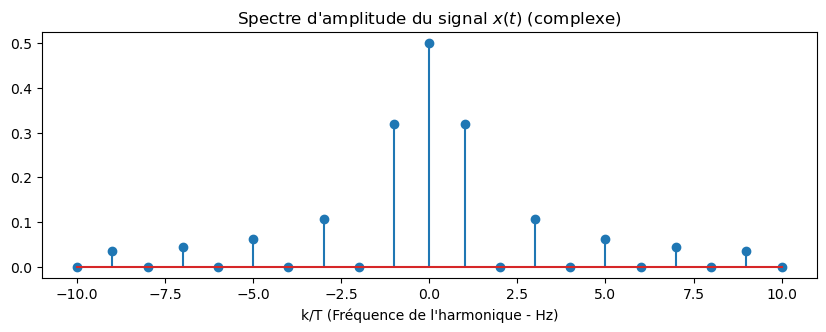

In [5]:
# En reprenant la fonction x2(t) définie précedemment 
T = 1.0
w0 = 2*np.pi/T
t2 = np.arange(0, T, dt)
N = int(T/dt)
NHarmonique = 10

C = np.zeros((NHarmonique+1,1), dtype=complex)
for k in range(NHarmonique+1):
    if k==0:
        n_exp = np.ones_like(t2)
    else:
        n_exp = np.exp(-1j*k*w0*t2)
    C[k] = (1/T)*np.sum(x2[0:N]*n_exp)*dt
    

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.stem(range(-NHarmonique, NHarmonique+1), np.concatenate((np.abs(np.flip(C[1:])), np.abs(C))))
ax1.set_title("Spectre d\'amplitude du signal $x(t)$ (complexe)")
ax1.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

Que se passe-t-il maintenant si on double la période du signal? Autrement dit, on répète périodiquement l’intervalle $0 < t < 2$ secondes du signal apériodique initial, comme le montre la figure suivante :

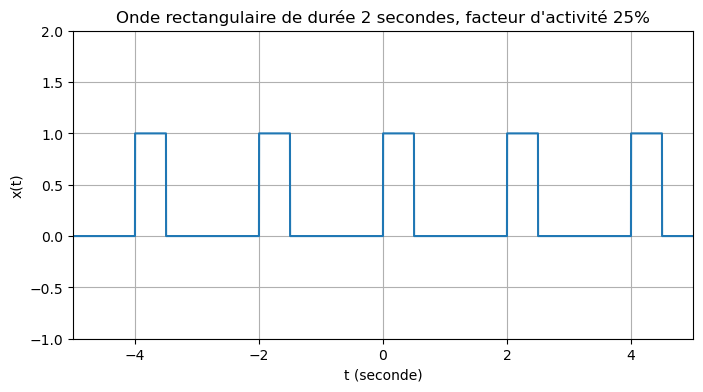

In [6]:
x2 = 0.5 * signal.square(np.pi * t, 0.25) +0.5

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(t,x2)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Onde rectangulaire de durée 2 secondes, facteur d'activité 25%")
ax1.grid()

On observe que dans une période, le facteur d’activité est maintenant de 25% (0 à ½ seconde, pour une période de 2 secondes). Les coefficients de Fourier seront certainement différents de ceux du signal précédent, dont la facteur d’activité était 50% (0 à ½ seconde, pour une période de 1 seconde).

En calculant le module des 20 premiers coefficients de Fourier de ce signal périodique, de période $T=2$ secondes, on obtient la figure suivante (encore ici, l’axe des fréquences montre $k/T$, et non $k$) : 


Text(0.5, 0, "k/T (Fréquence de l'harmonique - Hz)")

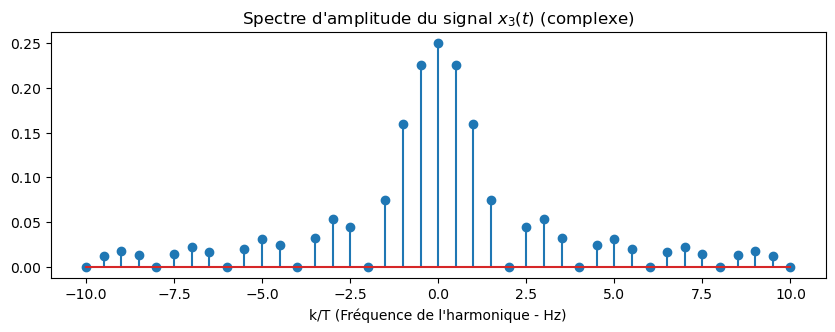

In [7]:
# En reprenant la fonction x3(t) définie précedemment 
T = 2.0
w0 = 2*np.pi/T
t3 = np.arange(0, T, dt)
N = int(T/dt)
NHarmonique = 20

C = np.zeros((NHarmonique+1,1), dtype=complex)
for k in range(NHarmonique+1):
    if k==0:
        n_exp = np.ones_like(t3)
    else:
        n_exp = np.exp(-1j*k*w0*t3)
    C[k] = (1/T)*np.sum(x2[0:N]*n_exp)*dt
    

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.subplots_adjust(hspace=0.5)

ax1 = plt.subplot(2,1,1)
ax1.stem(np.linspace(-NHarmonique/T, NHarmonique/T, 41), np.concatenate((np.abs(np.flip(C[1:])), np.abs(C))))
ax1.set_title("Spectre d\'amplitude du signal $x_3(t)$ (complexe)")
ax1.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

Portez bien attention à l’axe des fréquences. Dans le spectre de la première fonction périodique, on avait 5 raies spectrales entre 0 et 5 Hz (en excluant la DC et en comptant les raies d’amplitude nulle), donc des raies à 1, 2, 3, 4, et 5 Hz. Dans le spectre ci-haut, on a maintenant 10 raies spectrales entre 0 et 5 Hz (à ½, 1, 3/2, 2, …, i.e. par intervalle de $1/T$, où $T$ est la période --- 2 secondes).

Allons maintenant plus loin en répétant périodiquement l’intervalle $0<t<4$ secondes du signal apériodique initial. Ceci donne le signal de la figure suivante, de période $T=4$ secondes. En calculant les 40 premiers coefficients de Fourier de ce signal de période $T=4$ secondes, on obtient (pour le module) la figure suivante (axe des fréquences gradué en $k/T$):

Text(0.5, 0, "k/T (Fréquence de l'harmonique - Hz)")

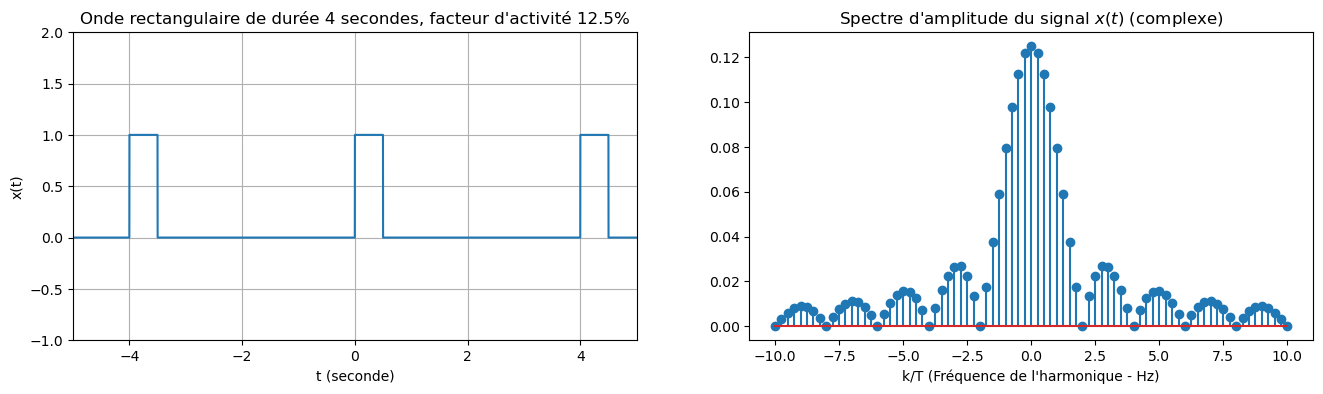

In [8]:
x4 = 0.5 * signal.square(0.5*np.pi * t, 0.125) +0.5

T = 4.0
w0 = 2*np.pi/T
t4 = np.arange(0, T, dt)
N = int(T/dt)
NHarmonique = 40

C = np.zeros((NHarmonique+1,1), dtype=complex)
for k in range(NHarmonique+1):
    if k==0:
        n_exp = np.ones_like(t4)
    else:
        n_exp = np.exp(-1j*k*w0*t4)
    C[k] = (1/T)*np.sum(x4[0:N]*n_exp)*dt

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(4)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,x4)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Onde rectangulaire de durée 4 secondes, facteur d'activité 12.5%")
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.stem(np.linspace(-NHarmonique/T, NHarmonique/T, 81), np.concatenate((np.abs(np.flip(C[1:])), np.abs(C))))
ax2.set_title("Spectre d\'amplitude du signal $x(t)$ (complexe)")
ax2.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

Nos conclusions :

1) A mesure que l’on augmente la période $T$, les raies spectrales sont de plus en plus rapprochées (puisque chaque raie se retrouve à la fréquence $k/T$)

2) L’enveloppe du spectre reste identique, sauf que sa valeur maximale diminue avec la période (avec $T=1$, le maximum du spectre est 0.5, avec $T=2$, le maximum du spectre est 0.25 et avec $T=4$, le maximum du spectre est 0.125), etc.  Ceci est normal puisque la valeur moyenne du signal diminue.

3) Conséquence du point (2) : si on multiplie les coefficients de Fourier par la période $T$, les spectres retrouvent tous la même amplitude (i.e. 0.5 – vérifiez bien).

4) En prenant $T \rightarrow \infty $, et en multipliant les coefficients de Fourier $X(k)$ par $T$, on devrait donc obtenir l’enveloppe du spectre (i.e. la courbe par où passent tous les points de chacun des spectres vus précédemment)

En appliquant le point (4), on arrive à la définition de la transformée de Fourier. Ainsi, le module de la transformée de Fourier du signal suivant (impulsion rectangulaire, de durée ½ seconde) devrait être la figure de droite, où l’axe horizontal est la fréquence f (en Hz), et l’axe vertical est le module de la transformée.



Text(0.5, 0, "k/T (Fréquence de l'harmonique)")

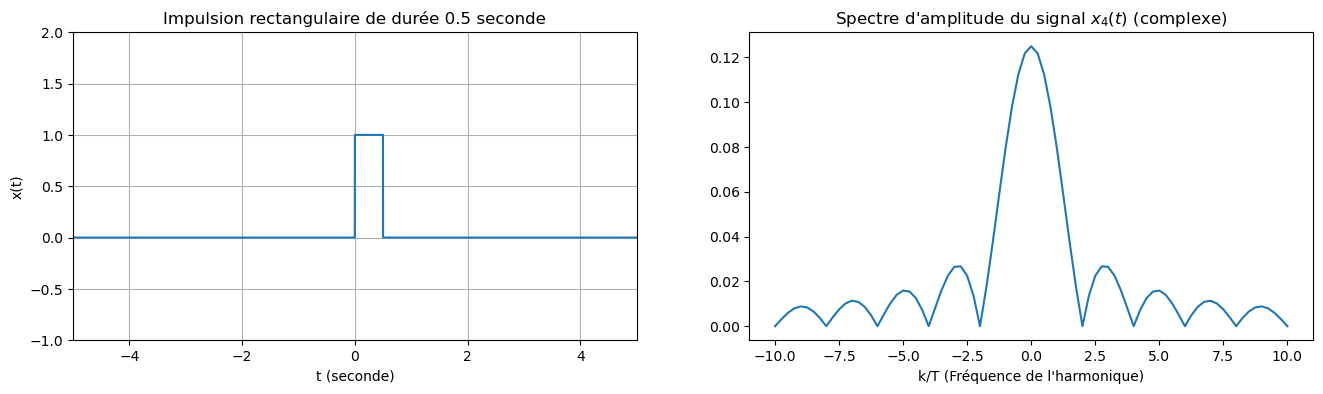

In [9]:
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(4)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,x)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Impulsion rectangulaire de durée 0.5 seconde")
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(np.linspace(-NHarmonique/T, NHarmonique/T, 81), np.concatenate((np.abs(np.flip(C[1:])), np.abs(C))))
ax2.set_title("Spectre d\'amplitude du signal $x_4(t)$ (complexe)")
ax2.set_xlabel("k/T (Fréquence de l'harmonique)")

## Expression mathématique de la transformée de Fourier

Lorsque l’on fait tendre la période $T$ vers l’infini, la fréquence fondamentale $\omega_0 = 2\pi/T$ tend vers zéro, ou plus précisément, $\omega_0$ tend vers un élément différentiel $d\omega$. Ainsi, la fréquence $k\omega_0$ de l’harmonique $k$ tend vers la fréquence continue $\omega$ (les harmoniques sont tellement rapprochées qu’on peut les considérer sur un axe de fréquences continues).

Ainsi, lorsque l’on fait tendre la période $T$ vers l’infini, on a le signal $x(t)$ apériodique initiale (par exemple), et l’intégrale de Fourier :

$$
X(k)=\frac{1}{T} \int_{t=0}^{t=T} x(t) e^{-j k \omega_0 t} d t
$$

devient une fonction de $\omega$ et non de $k$ ($k\omega_0 = \omega$ ). De plus, pour éviter que cette intégrale ne tende vers 0 ($T$ tend vers l’infini), il faut la multiplier par $T$ . On obtient donc finalement la transformée de Fourier d’un signal apériodique :

$$
X(\omega) = TX(k) \text{ lorsque T} \rightarrow \infty
$$

i.e.

<div class="alert alert-block alert-info">
Transformée de Fourier : 
    
$$
X(\omega)= \int_{t=-\infty}^{t=\infty} x(t) e^{-j \omega_0 t} d t
$$
</div>


Remarquez que l’on a pris l’intervalle $-\infty<t<\infty$ dans cette intégrale. Puisque les séries de Fourier sont définies pour n’importe quelle période $T$ du signal, on aurait tout aussi bien pu écrire

$$
X(\omega)= \frac{1}{T}\int_{t=-T/2}^{t=T/2} x(t) e^{-j \omega_0 t} d t
$$

On doit aussi réécrire l’équation de synthèse, c.a.d. la transformée de Fourier inverse, lorsque $T$ tend vers l’infini. L’équation de synthèse pour les séries de Fourier est :

$$
x(t)=\sum_{k=-\infty}^{\infty} X(k) e^{j k \omega_0 t}
$$

i.e. $x(t)$ est la somme de toutes ses harmoniques.

Lorsque la période $T$ tend vers l’infini, la fréquence $k\omega_0$ de chaque harmonique $k$ devient la fréquence continue $\omega$, et la somme devient une intégrale sur $\omega$ (i.e. sur toutes les harmoniques à toutes les fréquences $k\omega_0 = \omega$). Mais pour faire une intégrale avec cette somme, il faut bien un élément différentiel $d\omega$. Rappelons-nous qu’une intégrale peut être vue comme la limite d’une somme de surfaces élémentaires sous une courbe, chaque surface ayant la forme d’un rectangle très étroit et de hauteur égale à la fonction intégrée. Dans notre cas, la base de ces surfaces élémentaires est $d\omega$, et leur « hauteur » est

$$
X(k) e^{j k \omega_0 t}=X(\omega) e^{j \omega t}
$$

(puisque $X(k)$ est le coefficient de Fourier de la raie $k$, qui se trouve en fait à la fréquence $k\omega_0 = \omega$, autrement dit, $X(k) = X(k\omega_0) = X(\omega)$ ).

On peut donc écrire :


<div class="alert alert-block alert-info">
Transformée de Fourier Inverse : 
    
$$
x(t)=\frac{1}{2 \pi} \int_{\omega=-\infty}^{\omega=\infty} X(\omega) e^{j \omega t} d \omega
$$
</div>

i.e. l’équation de synthèse, que l’on appelle « transformée de Fourier inverse », qui permet de reconstruire le signal $x(t)$ à partir de son spectre de Fourier $X(\omega)$. Notez bien ici que $X(\omega)$ est une fonction continue (et non pas une série de « bâtonnets » $X(k)$ comme dans le cas des séries de Fourier, applicables uniquement aux signaux périodiques). Le facteur $1/(2\pi)$ est plus subtil à expliquer …

Les fonctions encadrées en bleu permettent de passer du domaine du temps au domaine des fréquences, et vice-versa, pour tout signal $x(t)$, *sans imposer que celui-ci soit périodique*. Ce sont les équations de la transformée de Fourier.

Si le développement mathématique de cette section vous laisse un peu froid, voyez simplement ces deux équations comme une extension des séries de Fourier à des signaux $x(t)$ apériodiques quelconques. Les différences fondamentales sont donc :

| Signaux Périodiques | Signaux apériodique | 
| --- | --- |
| Formés uniquement de sinusoïdes dont les fréquences sont des multiples entiers de la période fondamentale (les harmoniques)   | Formés de sinusoïdes à toutes les fréquences |
| Représentation spectrale :  $X(k)$ (Séries de Fourier) | Représentation spectrale : $X(\omega)$ (Transformée de Fourier) | 
| $X(k)$ est une fonction discrète | $X(\omega)$ est une fonction continue | 
| $X(k)$ s’obtient en échantillonnant $X(\omega)$ à intervales discrets $k/T$ | $X(\omega)$ est l’enveloppe des raies $X(k)$, i.e. la courbe qui passe par le sommet de chaque raie spectrale $X(k)$ | 
| ... | ... |


## Un exemple

### Exemple 1

Calculez la transformée de Fourier $X(\omega)$ du signal $x(t)$ montré à la figure suivante (l’axe horizontal est le temps $t$, en secondes) et montrez qu’en remplaçant $\omega$ par $k\omega_0$, et en divisant par $T$, on obtient les coefficients de Fourier $X(k)$ d’une onde carrée périodique.

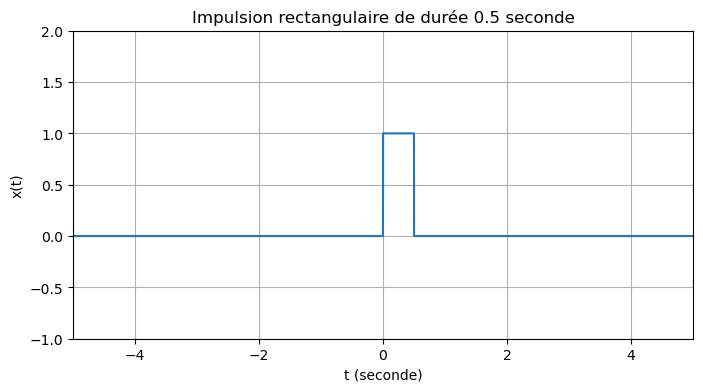

In [10]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(4)

ax1 = plt.subplot(1,1,1)
ax1.plot(t,x)
ax1.set_ylim([-1, 2])
ax1.set_xlim([-5, 5])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (seconde)")
ax1.set_title("Impulsion rectangulaire de durée 0.5 seconde")
ax1.grid()

### Solution 

Le signal $x(t)$ est une impulsion rectangulaire, d’amplitude 1, de durée ½ seconde, commençant à $t=0$.

Sa transformée de Fourier est donnée par (définition) :

$$
X(\omega)= \int_{t=-\infty}^{t=\infty} x(t) e^{-j \omega_0 t} d t
$$

$$
X(\omega)= \int_{t=0}^{t=1/2} 1 e^{-j \omega_0 t} d t
$$

puisque $x(t)$ est nul à l’extérieur de l’intervalle $0<t<\frac{1}{2}$. En intégrant, on trouve

$$
\begin{aligned}
X(\omega) & =\left.\frac{e^{-j \omega t}}{-j \omega}\right|_{t=0} ^{t=1 / 2} \\
& =\frac{e^{-j \omega / 2}-1}{-j \omega} \\
& =\frac{1-e^{-j \omega / 2}}{j \omega}
\end{aligned}
$$

En mettant le terme $e^{-j\omega/4}$ en évidence, on obtient finalement :

$$
X(\omega)=e^{-j \omega / 4}\left(\frac{e^{j \omega / 4}-e^{-j \omega / 4}}{j \omega}\right)
$$

Le terme entre parenthèses est « presque » un sinus (théorème d’Euler). Il faudrait simplement retrouver $2j$ au dénominateur. On va donc réécrire le dénominateur comme suit :

$$
X(\omega)=e^{-j \omega / 4}\left(\frac{e^{j \omega / 4}-e^{-j \omega / 4}}{(2)(2 j)(\omega / 4)}\right)
$$

de sorte que $X(\omega)$ peut maintenant s’écrire :

$$
X(\omega)=\frac{1}{2} e^{-j \omega / 4}\left(\frac{\sin (\omega / 4)}{(\omega / 4)}\right)
$$

(Le facteur ½ vient du terme « 2 » qui  est tout seul au dénominateur de l’expression précédente).

Notez que le terme

$$
\left(\frac{\sin (\omega / 4)}{(\omega / 4)}\right)
$$

est le sinus cardinal de $\omega/4$. En général, le sinus cardinal de $x$ s’écrit

$$
\operatorname{sinc}(x)=\left(\frac{\sin (x)}{x}\right)
$$

On montre facilement que $\operatorname{sinc}(0) = 1$ (puisque $\sin(x)$ tend vers $x$ lorsque $x$ tend vers 0…)

On peut maintenant afficher le module et la phase de la transformée de Fourier $X(\omega)$. On peut aussi afficher le module et la phase de $X(\omega)$ en fonction de la fréquence $f$ en Hz. Il suffit de remplacer $\omega$ par $2\pi f$. $X(\omega)$ devient $X(f)$.


Text(0.5, 0, 'k/T (Fréquence)')

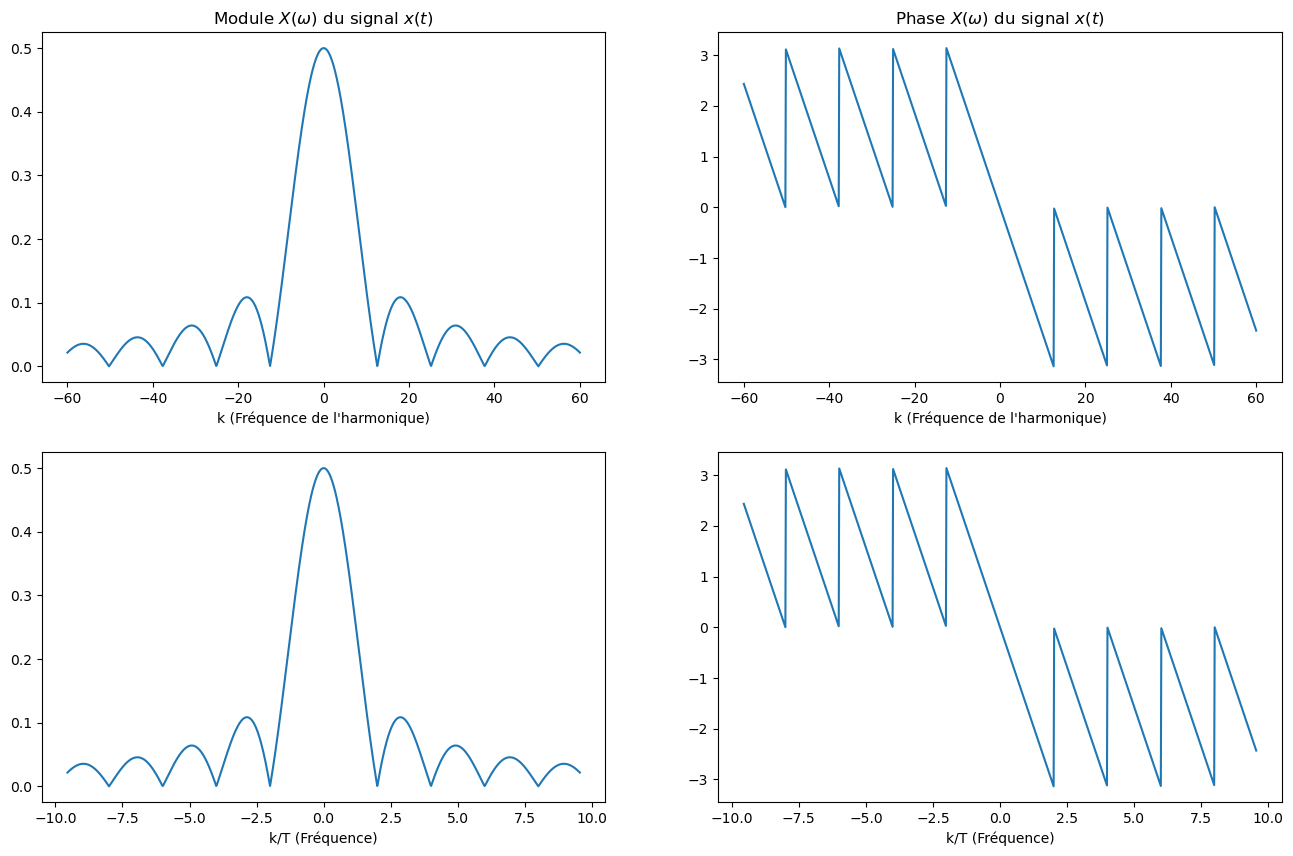

In [11]:
w = np.linspace(-60, 60, 1000)
Xw = (1/2)*np.exp(-1j*w*(1/4))*(np.sin(w/4)/(w/4))

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = plt.subplot(2,2,1)
ax1.plot(w, np.abs(Xw))
ax1.set_title("Module $X(\omega)$ du signal $x(t)$")
ax1.set_xlabel("k (Fréquence de l'harmonique)")

ax2 = plt.subplot(2,2,2)
ax2.plot(w, np.angle(Xw))
ax2.set_title("Phase $X(\omega)$ du signal $x(t)$")
ax2.set_xlabel("k (Fréquence de l'harmonique)")

ax3 = plt.subplot(2,2,3)
ax3.plot(w/(2*np.pi), np.abs(Xw))
ax3.set_xlabel("k/T (Fréquence)")

ax4 = plt.subplot(2,2,4)
ax4.plot(w/(2*np.pi), np.angle(Xw))
ax4.set_xlabel("k/T (Fréquence)")

Notez que l’on obtient, pour le module, le même spectre que rpécédemment. Normal, puisque le signal $x(t)$ analysé (onde carrée de durée ½ seconde) est le même.

Notez aussi que le module du spectre de l’onde carrée passe par zéro exactement à tous les 2 Hz (i.e. à 2, 4, 6, 8 Hz, etc.). *Essayez d’expliquer pourquoi l’on observe ce phénomène.*

Maintenant, on doit montrer qu’en remplaçant $\omega$ par $k\omega_0 = k$ ($2\pi/T$), et en divisant par $T$, on obtient les coefficients de Fourier $X(k)$ d’une onde carrée périodique, qui est la version périodique de $x(t)$ de notre impulison d'une demi-seconde.

On a :

$$
X(\omega)=\frac{1}{2} e^{-j \omega / 4}\left(\frac{\sin (\omega / 4)}{(\omega / 4)}\right)
$$

et donc : 

$$
X(k)=\frac{1}{2T} e^{-j 2\pi k / 4T}\left(\frac{\sin (2 \pi k / 4T)}{(2 \pi k / 4T)}\right)
$$

En simplifiant un peu :

$$
X(k)=\frac{1}{2T} e^{-j \pi k / 2T}\left(\frac{\sin (\pi k / 2T)}{(\pi k / 2T)}\right)
$$

En prenant $T=1$, ce qui signifie que la version périodique de $x(t)$, analysé ici, possède une période de 1 sec donc une fréquence fondamentale de 1 Hz.  Ceci équivaut à échantillonner $X(f)$ à tous les 1 Hz.

$$
X(k)=\frac{1}{2} e^{-j \pi k / 2}\left(\frac{\sin (\pi k / 2)}{(\pi k / 2)}\right)
$$

ce qui correspond aux bâtonnets dans les figures suivantes :

Text(0.5, 0, "k/T (Fréquence de l'harmonique - Hz)")

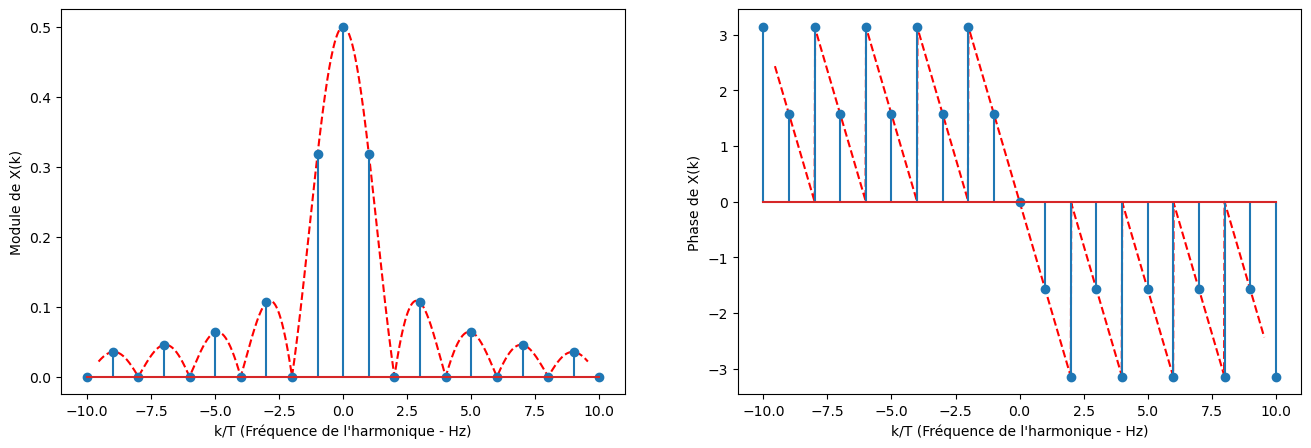

In [12]:
K = 10
k = np.arange(1, K+1)
Xk = 0.5 * np.exp(-1j * np.pi * k / 2) * (np.sin(np.pi*k/2)/(np.pi * k /2))
Xk_neg = 0.5 * np.exp(-1j * np.pi * -k / 2) * (np.sin(np.pi*-k/2)/(np.pi * -k /2))
X0 = [0.5]
Xk = np.concatenate((np.flip(Xk_neg), X0, Xk))

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(w/(2*np.pi), np.abs(Xw), ls = '--', color='r')
ax1.stem(np.linspace(-K, K, 21), (np.abs(Xk)))
ax1.set_ylabel("Module de X(k)")
ax1.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

ax2 = plt.subplot(1,2,2)
ax2.plot(w/(2*np.pi), np.angle(Xw), ls = '--', color='r')
ax2.stem(np.linspace(-K, K, 21), (np.angle(Xk)))
ax2.set_ylabel("Phase de X(k)")
ax2.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

Tel que vu dans le chapitre sur les séries de Fourier, on peut reconstruire le signal temporel périodique correspondant par la somme des harmoniques : 

$$
x(t)=\sum_{k=-\infty}^{\infty} X(k) e^{j k \omega_0 t}
$$

où $\omega_0 = 2\pi/T$ ($= 2\pi$ dans notre cas, puisque $T=1$). En faisant cette somme pour les 10 premières harmoniques montrées dans les figures ci-haut ($k$ entre –10 et 10), on obtient le signal $x(t)$ suivant (on montre ici les 3 premières périodes, pour $t$ entre 0 et 3 secondes) :

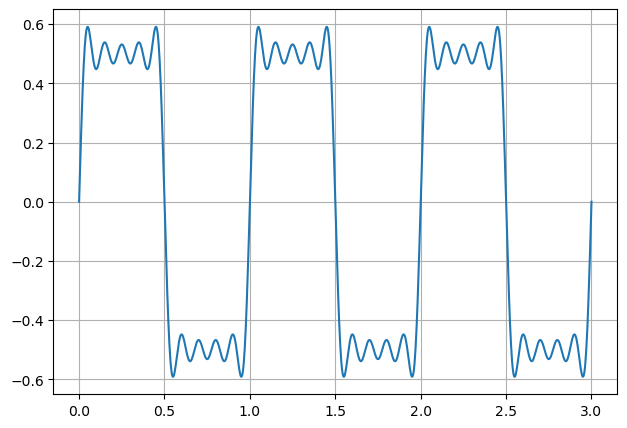

In [13]:

t = np.linspace(0,3,1000)
y = Xk[0] * np.ones_like(t, dtype=complex)
for k in range(1,11):
    y += 2*np.abs(Xk[k+10])*np.cos(k * 2 * np.pi * t + np.angle(Xk[k+10]))
    
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(t, np.real(y)) #Suppression de l'avertissement Python "Cast complex to real discards imginary. Les valeurs imaginaires sont à 0
ax1.grid(True)

On observe que la somme de ces 10 premières harmoniques tend vers une onde carrée périodique, de période $T=1$, et de facteur d’activité de 50 % (i.e. une version périodique du signal $x(t)$). 

On aurait pu échantillonner $X(f)$ plus finement, par exemple à tous les 0.5 Hz (en choisissant $T=2$). Ainsi, en remplaçant $\omega$ par $k\omega_0 = k (2\pi/T) = k (2\pi/2) = k\pi$ dans l’expression:

$$
X(\omega) = \frac{1}{2} e^{-j \omega / 4}\left(\frac{\sin (\omega / 4)}{(\omega / 4)}\right)
$$

et en divisant par $T=2$, on trouve

$$
X(\omega) = \frac{1}{4} e^{-j k \pi / 4}\left(\frac{\sin (k \pi / 4)}{(k \pi / 4)}\right)
$$

Les figures suivantes montrent le module et la phase de $X(k)$, de même que l’enveloppe du module et de la phase de $X(\omega)/2$ (division par 2 pour mettre $X(k)$ et $X(\omega)$ à la même échelle) :

Text(0.5, 0, "k/T (Fréquence de l'harmonique - Hz)")

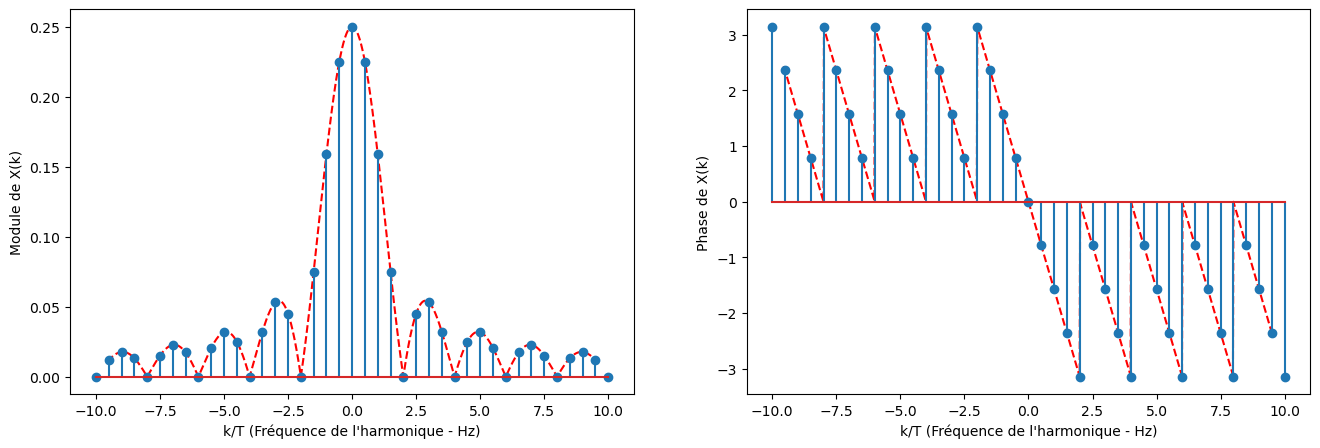

In [14]:
K = 20
k = np.arange(1, K+1)
Xk = 0.25 * np.exp(-1j * np.pi * k / 4) * (np.sin(np.pi*k/4)/(np.pi * k /4))
Xk_neg = 0.25 * np.exp(-1j * np.pi * -k / 4) * (np.sin(np.pi*-k/4)/(np.pi * -k /4))
X0 = [0.25]
Xk = np.concatenate((np.flip(Xk_neg), X0, Xk))

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(w/(2*np.pi), 0.5*np.abs(Xw), ls = '--', color='r')
ax1.stem(np.linspace(-K/2, K/2, 2*K+1), (np.abs(Xk)))
ax1.set_ylabel("Module de X(k)")
ax1.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

ax2 = plt.subplot(1,2,2)
ax2.plot(w/(2*np.pi), np.angle(Xw), ls = '--', color='r')
ax2.stem(np.linspace(-K/2, K/2, 2*K+1), (np.angle(Xk)))
ax2.set_ylabel("Phase de X(k)")
ax2.set_xlabel("k/T (Fréquence de l'harmonique - Hz)")

Par rapport aux spectres avec $T=1$ vu précédemment, on remarque que les raies spectrales sont 2 fois plus rapprochées (normal, puisque l’on a choisit ici $T=2$ au lieu de $T=1$). De plus, la DC (raie $k=0$) vaut ici 0.25, et non 0.5. Ceci s’explique simplement par le fait que la période est maintenant $T=2$, mais que la durée du pulse rectangulaire est toujours la même, i.e. ½ seconde. Comme la DC est l’intégrale de la fonction (½), divisée par la période (2), on trouve la valeur de ¼.
En calculant la somme des 20 premières harmoniques montrées dans les figures ci-haut, selon l’équation de synthèse

$$
x(t)=\sum_{k=-\infty}^{\infty} X(k) e^{j k \omega_0 t}
$$

où $\omega_0 = 2\pi/T = 2\pi/2 = \pi$, on trouve le signal $x(t)$ montré à la figure suivante (l’axe horizontal est le temps $t$, en secondes) :

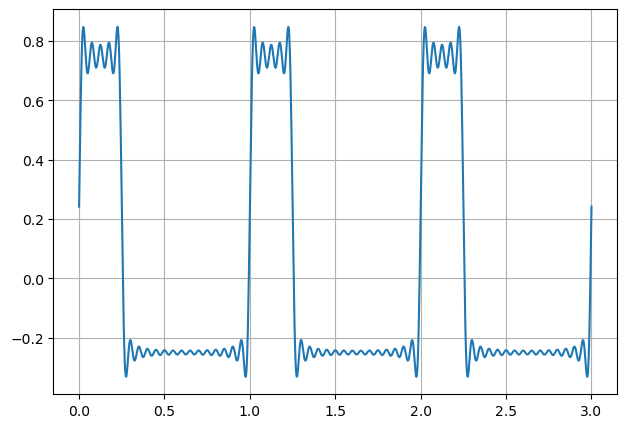

In [15]:

t = np.linspace(0,3,1000)
y = Xk[0] * np.ones_like(t, dtype=complex)
for k in range(1,21):
    y += 2*np.abs(Xk[k+20])*np.cos(k * 2 * np.pi * t + np.angle(Xk[k+20]))
    
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(t, np.real(y)) #Suppression de l'avertissement Python "Cast complex to real discards imginary. Les valeurs imaginaires sont à 0
ax1.grid(True)

En général : 
<div class="alert alert-block alert-info">
En remplaçant $\omega$ par $k (2\pi/T)$ dans $X(\omega)$, puis en divisant par $T$, on trouve les coefficients de Fourier $X(k)$ d’un signal $x(t)$ périodique, de période $T$, dont la période principale est égale au signal temporel dont la transformée de Fourier est $X(\omega)$.
</div>

## Compromis temps-fréquence

L’analyse d’un signal rectangulaire nous permet de formuler une propriété importante de la transformée de Fourier :

Plus un signal $x(t)$ est localisé dans le temps, plus son spectre de Fourier est étalé en fréquences, et vice-versa.

Les deux limites de cette propriété sont

1) la DC : signal complètement étalé dans le temps, et complètement localisé en fréquences (i.e. une seule composante, à f = 0 Hz)

2) l’impulsion : signal complètement localisé dans le temps, et complètement étalé en fréquences (le spectre d’une impulsion temporelle est « plat », i.e. que son module est le même peu importe la fréquence).

Les figures suivantes montrent donc le module de la transformée de Fourier, $X(f)$, pour des impulsions rectangulaires de durées différentes, la première (la DC) ayant une durée infinie. On observe, dans les figures de droite, que la largeur du lobe principal du spectre est inversement proportionnelle à la durée de l’impulsion rectangulaire.



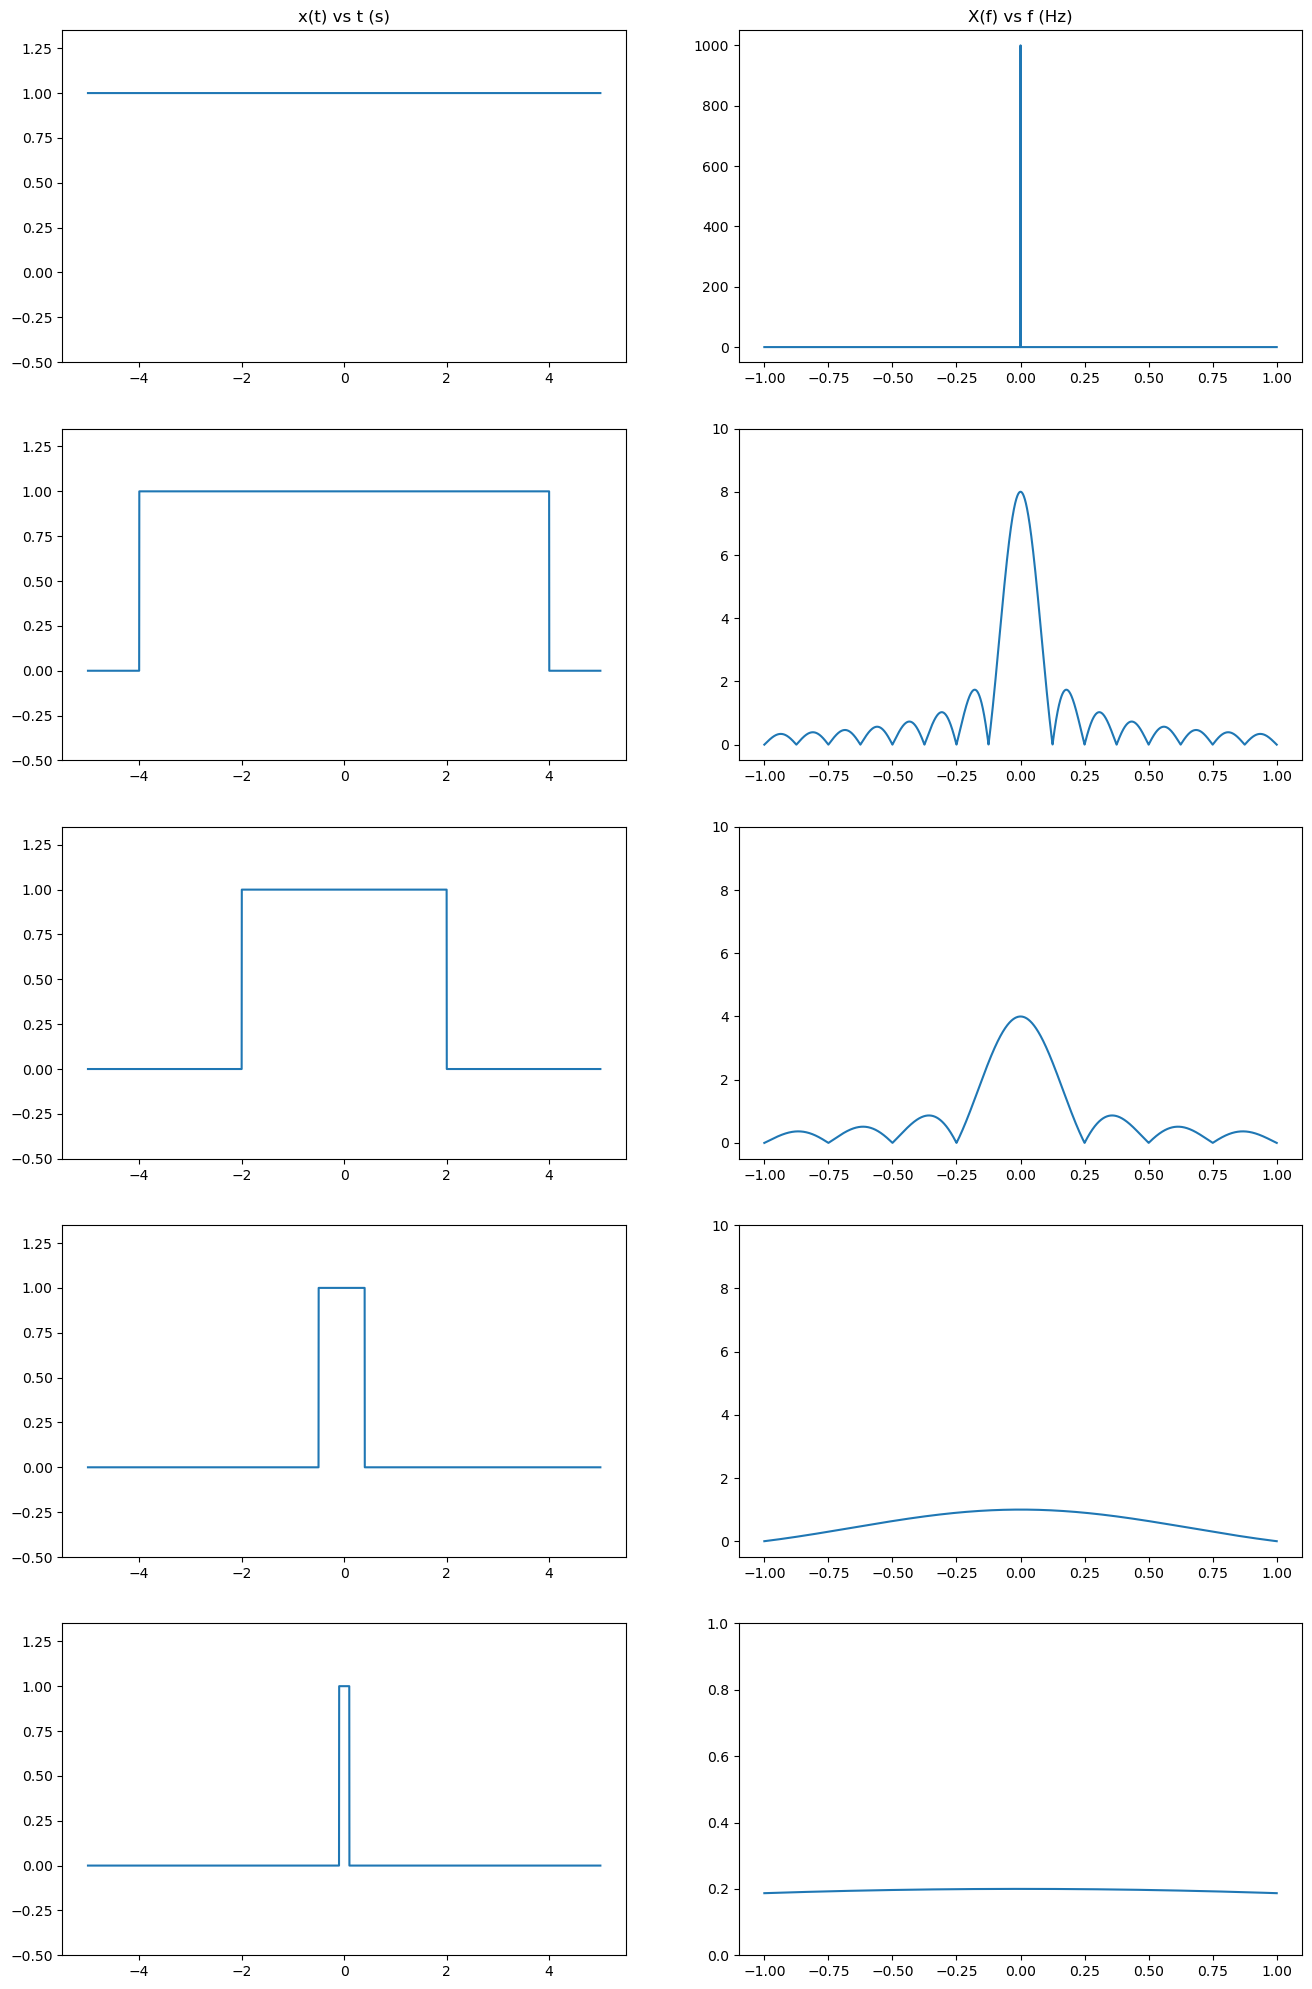

In [16]:
N = 10000
t = np.linspace(-5,5, N)
x1 = np.ones_like(t)

x2 = np.ones_like(t)
x2[0:1000] = 0
x2[-1000:] = 0

x3 = np.zeros_like(t)
x3[3000:7000] = 1

x4 = np.zeros_like(t)
x4[4500:5400] = 1

x5 = np.zeros_like(t)
x5[4900:5100] = 1

f = np.linspace(-1,1, N)
Xw1 = np.zeros_like(t)
Xw1[5000] = 1000  #Pour un signal infini, le pulse a une hauteur infinie. On met 1000 pour estimer

Xw2 = (8)*np.exp(-1j*np.pi*f*(8))*(np.sin(f*np.pi*8)/(f*np.pi*8))

Xw3 = (4)*np.exp(-1j*np.pi*f*(4))*(np.sin(f*np.pi*4)/(f*np.pi*4))

Xw4 = (1)*np.exp(-1j*np.pi*f*(1))*(np.sin(f*np.pi*1)/(f*np.pi*1))

Xw5 = (0.2)*np.exp(-1j*np.pi*f*(0.2))*(np.sin(f*np.pi*0.2)/(f*np.pi*0.2))

plt.figure(figsize=(16,25))
ax1 = plt.subplot(5, 2, 1)
ax1.set_ylim(-0.5, 1.35)
ax1.plot(t, x1)
ax1.set_title("x(t) vs t (s)")

ax2= plt.subplot(5, 2, 2)
ax2.plot(f, Xw1)
ax2.set_title("X(f) vs f (Hz)")

ax3 = plt.subplot(5, 2, 3)
ax3.set_ylim(-0.5, 1.35)
ax3.plot(t, x2)

ax4 = plt.subplot(5, 2, 4)
ax4.set_ylim(-0.5, 10)
ax4.plot(f, np.abs(Xw2))

ax5 = plt.subplot(5, 2, 5)
ax5.set_ylim(-0.5, 1.35)
ax5.plot(t, x3)

ax6 = plt.subplot(5, 2, 6)
ax6.set_ylim(-0.5, 10)
ax6.plot(f, np.abs(Xw3))

ax7 = plt.subplot(5, 2, 7)
ax7.set_ylim(-0.5, 1.35)
ax7.plot(t, x4)

ax8 = plt.subplot(5, 2, 8)
ax8.set_ylim(-0.5, 10)
ax8.plot(f, np.abs(Xw4))

ax9 = plt.subplot(5, 2, 9)
ax9.set_ylim(-0.5, 1.35)
ax9.plot(t, x5)

ax10 = plt.subplot(5, 2, 10)
ax10.set_ylim(0, 1)
ax10.plot(f, np.abs(Xw5))


Remarquez qu’on a multiplié par 10 l’échelle du dernier spectre de la figure précédente afin de bien le visualiser. A mesure que la durée du signal rectangulaire diminue, l’énergie contenue dans le signal diminue d’autant, ce qui atténue la valeur maximale du spectre.

Afin d’obtenir des spectres de même amplitude maximale, et ainsi préserver l’énergie des différents signaux, il aurait fallu augmenter l’amplitude du signal rectangulaire à mesure que sa durée diminue, de façon à obtenir des rectangles à surface constante. Ainsi, lorsque le signal tend vers une impulsion (durée presque nulle), son amplitude doit tendre vers l’infini. C’est la définition de l’impulsion idéale de Dirac, $\delta(t)$. Son spectre est parfaitement plat (voir le dernier spectre de la figure précédente), i.e. que l’amplitude de sa transformée de Fourier vaut 1 pour toutes les fréquences.

La règle de base pour avoir une idée rapide sur la forme du spectre d’un signal rectangulaire est simple :

> Le lobe principal du spectre (i.e. entre la DC et le premier zéro spectral) s’étend de 0 à $1/D$ Hz, où $D$ est la durée du signal.

Par exemple, , la durée du premier signal rectangulaire est de 8 secondes (-4 à 4), de sorte que son premier zéro spectral est à la fréquence 1/D = 1/8 = 0.125 Hz (voir spectre correspondant pour confirmer). Le deuxième signal rectangulaire a une durée de 4 secondes, de sorte que son premier zéro spectral est à ¼ = 0.250 Hz. Le troisième signal (qui s’étend de –½ à ½ seconde) a son premier zéro spectral à 1 Hz, et le dernièr à 5 Hz (pas visible sur son spectre) puisqu’il a une durée de 0.2 seconde.

## Transformée de Fourier de fonctions périodiques

Dans la section précédente, nous avons décrit la transformée de Fourier comme une technique d’analyse spectrale pour les signaux apériodiques. On l’a présentée comme une extension des séries de Fourier, lorsque l’on fait tendre la période du signal vers l’infini.

En fait, on peut appliquer la transformée de Fourier même aux signaux périodiques. L’interprétation du résultat demande toutefois un peu plus de subtilité que pour les séries de Fourier, où chaque raie spectrale est représentée comme un bâtonnet d’amplitude finie, à des positions entières (discrètes) sur l’échelle des fréquences (i.e. à 0, 1, 2, …, k, …, où k est le numéro de l’harmonique).

Dans le cas de la transformée de Fourier, le spectre est une fonction continue, et non une série de bâtonnets (fonction discrète). L’énergie d’un signal périodique sera concentrée aux harmoniques, et le spectre sera nul ailleurs (i.e. entre les harmoniques). Dans le cas le plus simple, celui d’une sinusoïde pure, le spectre sera constitué d’une seule raie (une dans les fréquences positives et une dans les fréquences négatives, en prenant la forme exponentielle de la transformée de Fourier), à la fréquence de la sinusoïde. Comme la sinusoïde ne contient qu’une seule fréquence, le spectre devra être vraiment nul partout, sauf exactement vis-à-vis la fréquence de la sinusoïde. Autrement dit, la raie spectrale d’une sinusoïde, dans le domaine de la transformée de Fourier, a une largeur infinitésimale. Comme l’énergie de la sinusoïde est non-nulle (dans le cas non-trivial), l’amplitude de sa raie spectrale devra être très grande (infinie) pour que l’énergie dans le domaine spectral (l’aire sous la courbe du spectre d’amplitude) soit non-nulle.

Autrement dit, la transformée de Fourier (forme exponentielle) d’une sinusoïde pure est formée de deux impulsions de Dirac dans le domaine des fréquences (infiniment étroites, et infiniment hautes) centrées à la fréquence de la sinusoïde (i.e. à $\omega_0$ et $-\omega_0$).

Les figures suivantes montrent le module de la transformée de Fourier $X(f)$ (à droite), pour un signal $x(t)$ (à gauche) formé d’un ou plusieurs cycles d’un signal rectangulaire. On voit se former la série d’impulsions dans le domaine spectral à mesure que l’on ajoute des périodes au signal $x(t)$, jusqu’à former un signal parfaitement périodique (infinité de périodes – en principe).


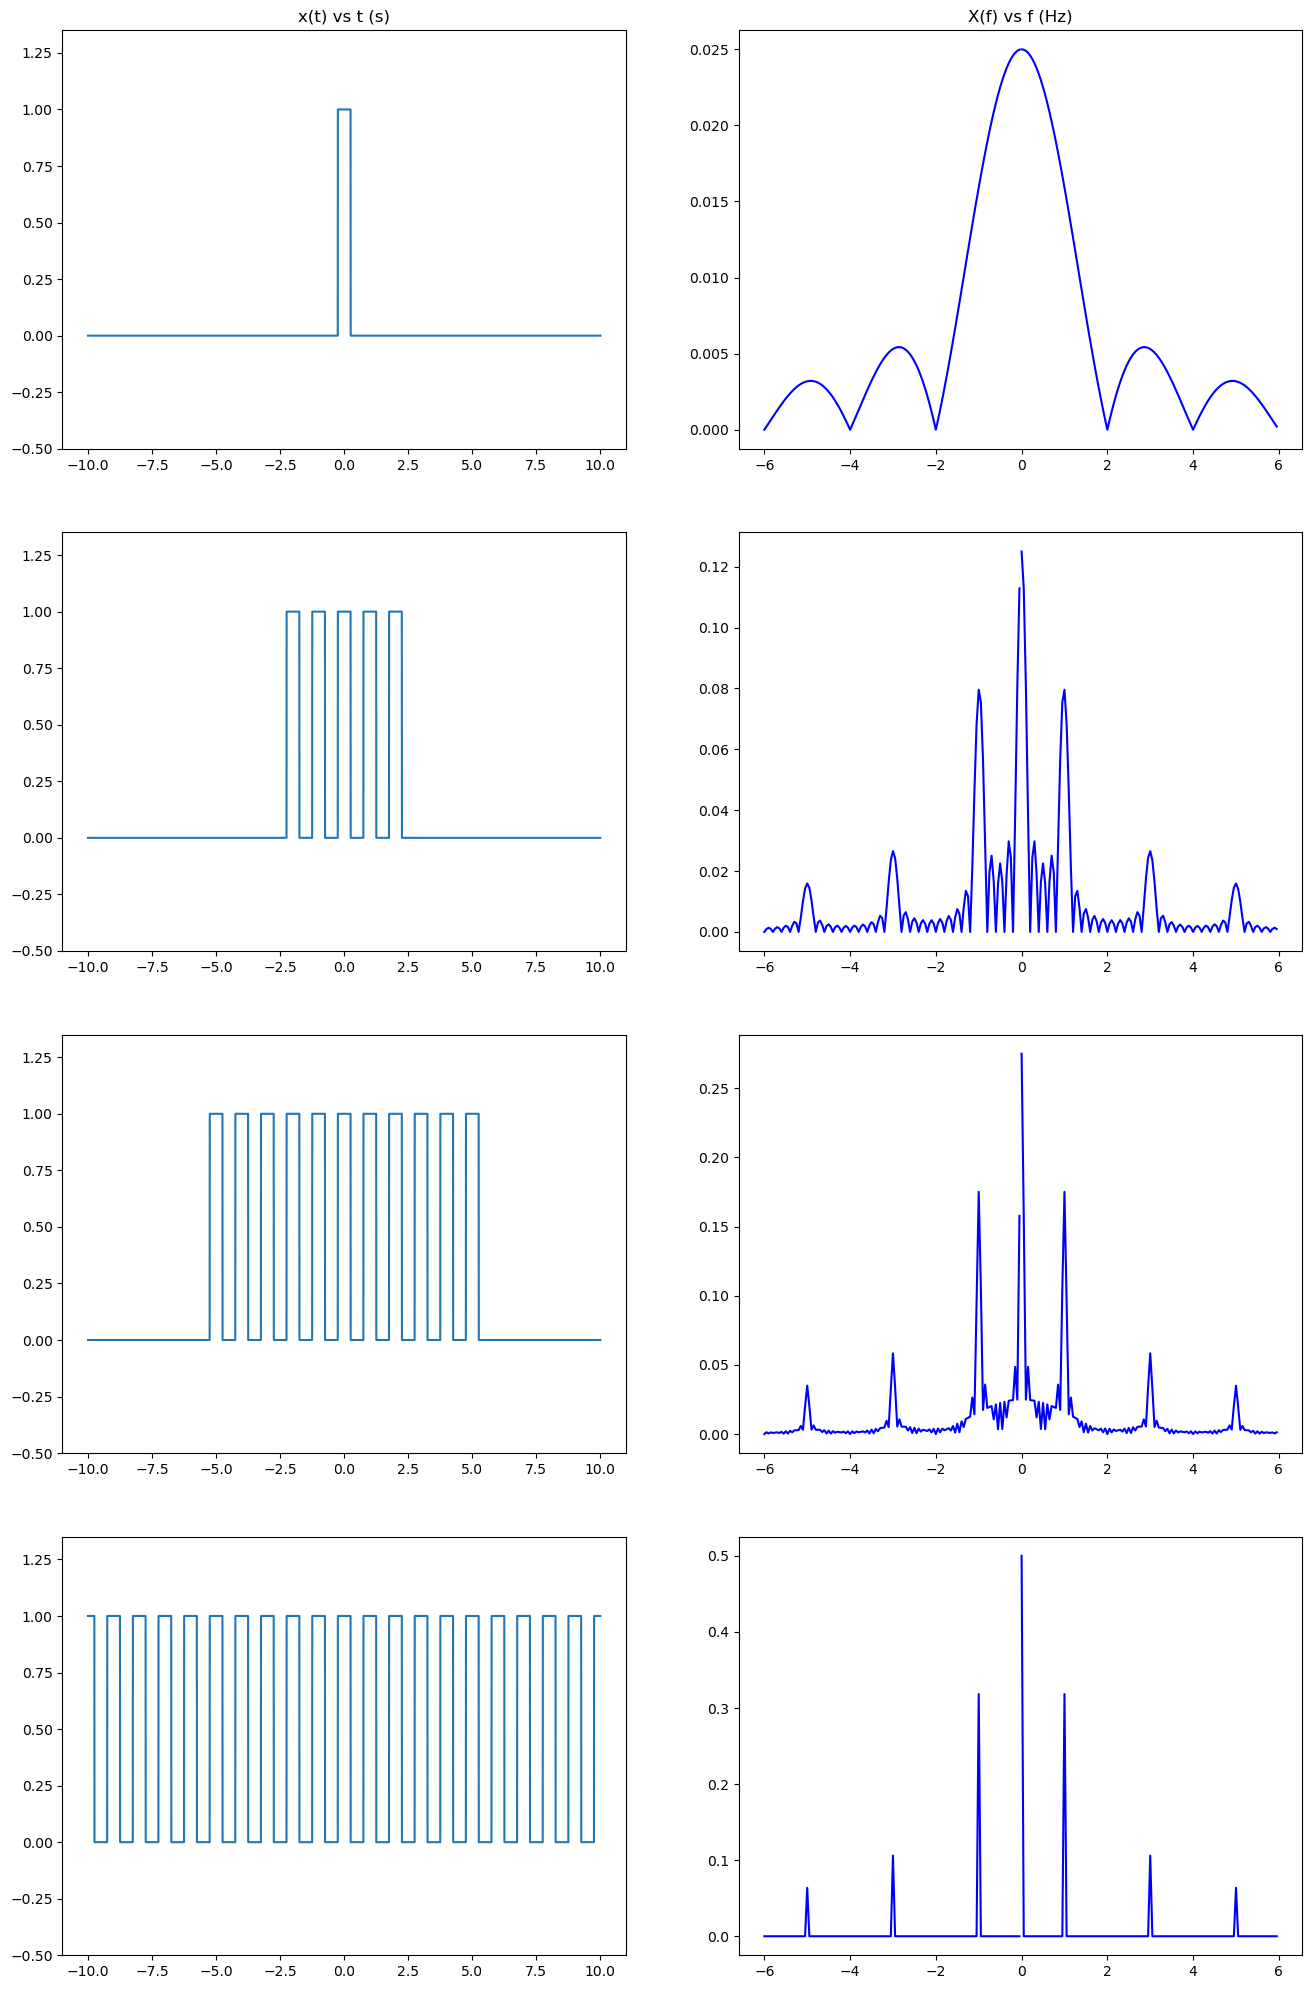

In [17]:
N = 20000
t = np.linspace(-10,10, N)

T = 1
f = 1/T
w = 2*np.pi*f
xp4 = -0.5*signal.square(w*t-np.pi/2)+0.5

xp3 = np.copy(xp4)
xp3[0:4500] = 0
xp3[-4500:] = 0

xp2 = np.copy(xp4)
xp2[0:7500] = 0
xp2[-7500:] = 0

xp1 = np.copy(xp4)
xp1[0:9500] = 0
xp1[-9500:] = 0

Xw1 = 1/N * np.fft.fft(xp1, N)
freq1 = np.fft.fftfreq(t.shape[-1], 0.001)

Xw2 = 1/N * np.fft.fft(xp2, N)
Xw3 = 1/N * np.fft.fft(xp3, N)
Xw4 = 1/N * np.fft.fft(xp4, N)

plt.figure(figsize=(16,25))
ax1 = plt.subplot(4, 2, 1)
ax1.set_ylim(-0.5, 1.35)
ax1.plot(t, xp1)
ax1.set_title("x(t) vs t (s)")

ax2= plt.subplot(4, 2, 2)
ax2.plot(freq1[0:120], np.abs(Xw1[0:120]), color='b')
ax2.plot(freq1[-120:], np.abs(Xw1[-120:]), color='b')
ax2.set_title("X(f) vs f (Hz)")

ax3 = plt.subplot(4, 2, 3)
ax3.set_ylim(-0.5, 1.35)
ax3.plot(t, xp2)

ax4 = plt.subplot(4, 2, 4)
ax4.plot(freq1[0:120], np.abs(Xw2[0:120]), color='b')
ax4.plot(freq1[-120:], np.abs(Xw2[-120:]), color='b')

ax5 = plt.subplot(4, 2, 5)
ax5.set_ylim(-0.5, 1.35)
ax5.plot(t, xp3)

ax6 = plt.subplot(4, 2, 6)
ax6.plot(freq1[0:120], np.abs(Xw3[0:120]), color='b')
ax6.plot(freq1[-120:], np.abs(Xw3[-120:]), color='b')

ax7 = plt.subplot(4, 2, 7)
ax7.set_ylim(-0.5, 1.35)
ax7.plot(t, xp4)

ax8 = plt.subplot(4, 2, 8)
ax8.plot(freq1[0:120], np.abs(Xw4[0:120]), color='b')
ax8.plot(freq1[-120:], np.abs(Xw4[-120:]), color='b')


On remarque que l’amplitude de la transformée de Fourier du signal périodique est une version « échantillonnée » du spectre de l’onde carrée non-périodique du haut de la page 20. On remarque cependant que l’amplitude des raies spectrales du signal périodique est beaucoup plus grande que l’enveloppe du spectre de l’onde carrée non-périodique (maximum de 0.5 vs maximum de 0.025). On a pris ici seulement 20 cycles d’onde carrée périodique, qui en compterait normalement une infinité. On comprend aisément qu’en prenant en compte toutes ces périodes, l’amplitude des raies spectrales de la figure du bas de la page 20 deviendrait infinie (impulsions de Dirac dans le domaine des fréquences).

Remarquez cependant que la position des raies spectrales du signal périodique (0, 1, 2, 3 Hz, etc.) correspond bien à la position fréquencielle des raies spectrales de la série de Fourier de l’onde carrée périodique (période T = 1 seconde; il y a donc des raies spectrales à tous les 1 Hz). Remarquez aussi que les « zéros » du spectre apparaissent bien à tous les 2 Hz dans le cas de l’onde périodique : ceci se déduit facilement de la durée de l’impulsion rectangulaire qui est ici de ½ seconde).

## Propriétés de la transformée de Fourier

### Linéarité

La transformée de Fourier est linéaire, i.e. que la transformée d’une somme est la somme des transformées. Formellement, on écrit :

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $f_1(t)+f_2(t)$  | $F_1(\omega)+F_2(\omega)$   | 
| $kf(t)$     | $kF(\omega)$   | 

### Dualité temps-fréquence

La forme mathématique de la transformée de Fourier et de la transformée de Fourier inverse révèle une grande similitude entre le passage du temps aux fréquences (de $x(t)$ à $X(\omega)$), et le passage des fréquences aux temps (de $X(\omega)$ à $x(t)$). Ce qui change essentiellement, c’est le signe de l’exponentielle complexe dans l’intégrale ($\mathrm{e}^{-j\omega t}$ dans la transformée, et $\mathrm{e}^{j\omega t}$ dans la transformée inverse). On peut ainsi supposer qu’il existe une symétrie dans la transformée de Fourier telle qu’à partir d’une forme donnée dans un domaine ou dans l’autre (ex.: une forme rectangulaire) on obtient la même forme dans l’autre domaine. C’est ce que montrent les figures suivantes. À gauche on a un signal rectangulaire et un sinus cardinal dans le domaine du temps, et à droite on présente leurs transformées de Fourier qui sont un sinus cardinal et un spectre rectangulaire, respectivement. 

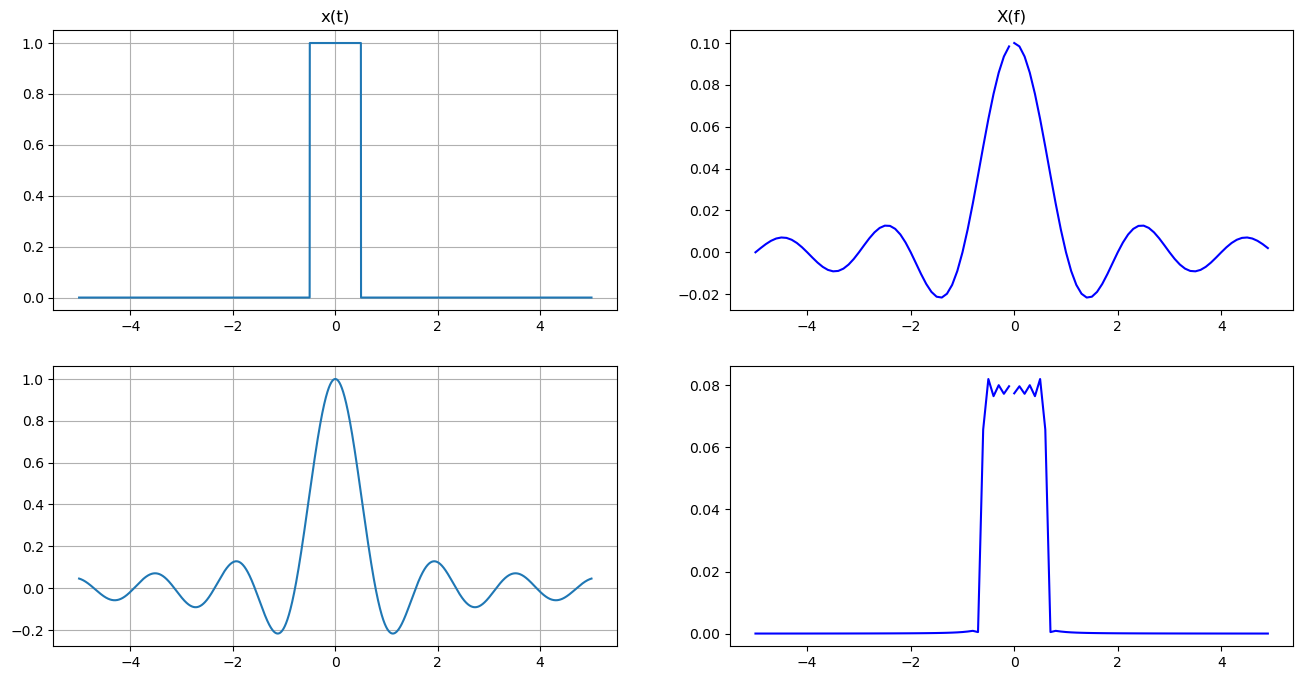

In [18]:
N=10000
t = np.linspace(-5,5,N)

xpulse = np.zeros_like(t)
xpulse[4500:5500] = 1

xcardinal = np.sin(4*t)/(4*t)

Xwpulse = 1/N * np.fft.fft(xpulse, N)
freq1 = np.fft.fftfreq(t.shape[-1], 0.001)
sign = np.ones(50)
sign[10:20] = -1
sign[30:40] = -1

Xwcardinal = 1/N * np.fft.fft(xcardinal, N)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)

ax1 = plt.subplot(2,2,1)
ax1.plot(t,xpulse)
ax1.set_title("x(t)")
ax1.grid()

ax2 = plt.subplot(2,2,2)
ax2.plot(freq1[0:50], sign[0:50]*np.abs(Xwpulse[0:50]), color='b')
ax2.plot(freq1[-50:], sign[0:50]*np.abs(Xwpulse[-50:]), color='b')
ax2.set_title("X(f)")

ax3 = plt.subplot(2,2,3)
ax3.plot(t, xcardinal)
ax3.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(freq1[0:50], np.abs(Xwcardinal[0:50]), color='b')
ax4.plot(freq1[-50:], np.abs(Xwcardinal[-50:]), color='b')

On note la dualité temps-fréquence dans cet exemple : la transformée de Fourier du signal rectangulaire est un sinus cardinal dans les fréquences, et la transformée de Fourier du sinus cardinal est un spectre rectangulaire. Cette dualité s’exprime :

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $F(t)$  | $2 \pi f(-\omega)$   |

### Changement d'échelle temporelle

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $f(at)$  | $1/ |a| F(\omega/a)$   |

Les valeurs $a > 1$ représentent une contraction temporelle, et donc une dilatation fréquentielle (spectre plus large). Les valeurs $a < 1$ représentent une dilatation temporelle, et donc une contraction fréquentielle (spectre plus étroit).

### Décalage temporel

Un décalage pur du signal temporel $x(t)$ a comme impact, dans le domaine fréquentiel, l’ajout d’un terme linéaire au spectre de phase. De façon formelle :

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $f(t-t_0)$  | $F(\omega)\mathrm{e}^{-j\omega t_0}$   |

On arrive à ce résultat en appliquant la Transformée de Fourier au signal $f(t-t_0)$, puis en opérant un simple changement de variable. Posons d’abord $f_2(t) = f(t-t_0)$. On peut alors écrire 

$$
\begin{aligned}
F_2(\omega) & =\int_{t=-\infty}^{\infty} f_2(t) e^{-j \omega t} d t \\
& =\int_{t=-\infty}^{\infty} f\left(t-t_0\right) e^{-j \omega t} d t \\
& =\int_{t=-\infty}^{\infty} f\left(t-t_0\right) e^{-j \omega\left(t-t_0\right)} e^{-j \omega t_0} d t \\
& =e^{-j \omega t_0} \int_{t=-\infty}^{\infty} f\left(t-t_0\right) e^{-j \omega\left(t-t_0\right)} d t \\
\end{aligned}
$$

En opérant le changement de variable $\tau = t-t_0$, et en notant que $d\tau = dt$ puisque $t_0$ est une constante, on peut réécrire

$$
F_2(\omega)=e^{-j \omega t_0} \int_{t=-\infty}^{\infty} f(\tau) e^{-j \omega \tau} d \tau=e^{-j \omega t_0} F(\omega)
$$

(ce qu’il fallait démontrer).

Dans le cas particulier où le signal non décalé $f(t)$ a une phase nulle (par exemple, une impulsion de Dirac centrée à $t=0$), le spectre de phase du signal $f(t-t_0)$ apparaît alors comme une courbe en dents de scie. Plus le décalage $t_0$ est important, plus la pente du spectre de phase est grande.

On peut interpréter le résultat obtenu ($F(\omega)\mathrm{e}^{-j\omega t_0}$) de la façon suivante :

- Comme le module de l’exponentielle $\mathrm{e}^{-j\omega t_0}$ est unitaire, un décalage temporel n’affecte aucunement le module de la transformée de Fourier du signal décalé; seule sa phase est modifiée.

- En fait, la phase de la transformée de Fourier du signal $f(t)$ est augmentée de $t_0\omega$ lorsque ce signal est retardé de $t_0$ sec.  Ce qui signifie qu’un système présentant un déphasage linéaire, de pente $t_0$, en fonction de $\omega$ va retarder un signal qui le traverse de $t_0$ sec.

### Décalage en fréquence

On peut démontrer la même propriété de décalage pour le domaine des fréquences, qui s’écrit :


| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $f(t) \mathrm{e}^{j\omega_0 t}$  | $F(\omega-\omega_0)$   |

Cette propriété signifie que si on connaît le spectre $F(\omega)$ d’un signal $f(t)$, alors en décalant ce spectre de $\omega_0$ (vers la droite), on obtient le spectre du signal  $f(t) \mathrm{e}^{j\omega_0}$, i.e. $f(t)$ multiplié par l’exponentielle complexe tournante  $\mathrm{e}^{j\omega_0}$. Il y a mieux : puisque $\cos{(\omega_0 t)}$ est la demi-somme des exponentielles complexes $\mathrm{e}^{j\omega_0}$ et $\mathrm{e}^{-j\omega_0}$, on a 

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $f(t) \cos{(\omega_0 t)}$  | $\left( F(\omega+\omega_0) + F(\omega-\omega_0) \right) / 2 $ |

C’est la propriété de modulation, qui indique ce qu’il advient d’un signal $f(t)$ lorsqu’on le module en amplitude (lorsqu’on le multiplie) par la sinusoïde $\cos{(\omega_0 t)}$. Le résultat est que le spectre de $f(t)$ se trouve décalé en fréquence, pour se retrouver centré à $\omega_0$. 

### Dérivée dans le temps

Puisque la transformée de Fourier indique comment remplacer la fonction $f(t)$ par une somme de sinusoïdes, on voit tout de suite que la dérivée de $f(t)$ par rapport au temps doit être formée de la somme des dérivées de toutes ses composantes sinusoïdales. Dans la forme exponentielle, les composantes sinusoïdales peuvent s’écrire comme des sommes d’exponentielles complexes $\mathrm{e}^{j\omega_0}$. Alors, la dérivée de $\mathrm{e}^{j\omega_0}$ correspondant simplement à une multiplication par $j\omega$, on a la propriété suivante :

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $\frac{df(t)}{dt}$  | $(j\omega) F(\omega)$ |

On peut généraliser cette propriété pour la dérivée nième de $f(t)$ :

| $f(t)$         | $F(\omega)$     |
|--------------|--------------------------|
| $\frac{df^n(t)}{dt^n}$  | $(j\omega)^n F(\omega)$ |

Nous avons présenté ici les principales propriétés de la transformée de Fourier.

### Exercices

Dans les exercices qui suivent, vous aurez besoin dans certains cas de l’impulsion de Dirac, $\delta(t-t_0)$ ou $\delta(\omega-\omega_0)$, pour indiquer une fonction qui prend la forme d’une impulsion infiniment étroite et d’amplitude infiniment grande, mais dont la surface totale (base fois hauteur) est égale à 1. Ainsi, en prenant en compte les décalages, l’impulsion $\delta(t-t_0)$ représente une impulsion de Dirac dans le domaine du temps centrée à $t_0$, et $\delta(\omega-\omega_0)$ représente une impulsion de Dirac dans le domaine des fréquences centrée à $\omega_0$.

#### Exercice 1

Calculez (et dessinez le plus fidèlement possible) la transformée de Fourier $X(\omega)$ des signaux $x(t)$ suivants. 


(a) $x(t) = \sin(2\pi50t)$

(b) $x(t) = \cos (2\pi100t - \pi /3)$

(c) $x(t) = 1$ pour $–2 < t < 2$ et 0 ailleurs

(d) $x(t) = 1$ pour $4 < t < 8$ et 0 ailleurs

(e) $x(t) = ±sin(25\pi t) / (25 \pi t)$

(f) $x(t) = \sin(25 \pi t) \cos(100 \pi t)$


#### Exercice 2

Donner l’expression mathématique du signal $x(t)$ dont la transformée de Fourier $X(\omega)$ est donnée par la figure suivante :


Text(0, 0.5, 'X(w)')

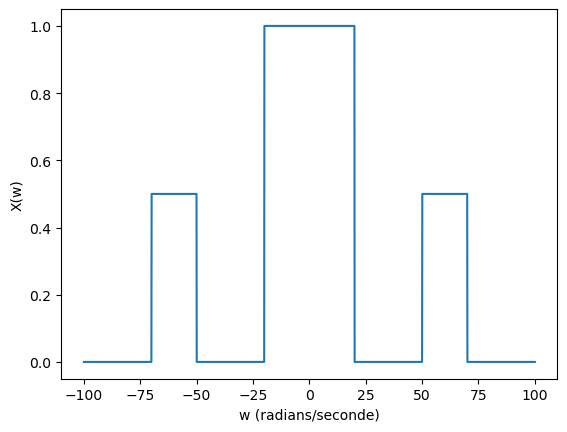

In [19]:
w = np.linspace(-100, 100, 2000)
Xw = np.zeros_like(w)
Xw[300:500] = 0.5
Xw[800:1200] = 1
Xw[1500:1700] = 0.5

plt.figure()
plt.plot(w, Xw)
plt.xlabel("w (radians/seconde)")
plt.ylabel("X(w)")

#### Exercice 3

Considérez le système simple suivant :

<img src="Images/05_FiltreBoiteNoire.png" width="480px" height="400px">

où le signal d’entrée x(t) est l’excitation périodique montrée à la figure suivante:

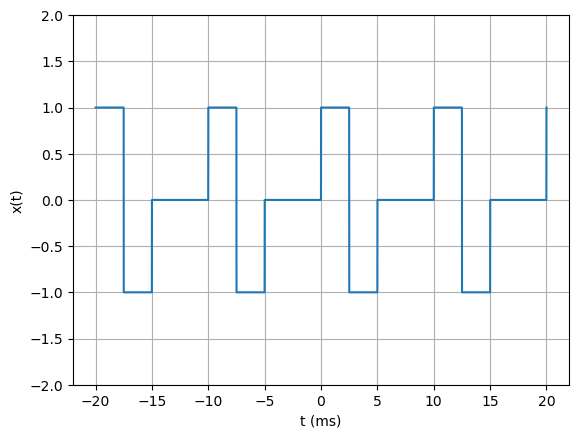

In [20]:
t = np.linspace(-20, 20, 4000)
x1 = 0.5*signal.square(2*np.pi*t/10-5*np.pi, duty=0.75)-0.5
x2 = 0.5*signal.square(2*np.pi*t/10, duty=0.25)+0.5

plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_ylim(-2,2)
ax1.plot(t, x1+x2)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t (ms)")
ax1.grid()

Déterminez la sortie y(t) du filtre si celui-ci est

(a) un filtre passe-bas idéal de fréquence de coupure 50 Hz

(b) un filtre passe-bas idéal de fréquence de coupure 150 Hz

(c) un filtre passe-bande idéal dont le gain est 1 entre 350 et 550 Hz, et dont le gain est nul à toutes les autres fréquences

Note : un filtre idéal est un filtre dont le gain est exactement 1 dans sa (ou ses) bande passante, dont le gain est 0 ailleurs, et dont la phase est nulle partout (i.e. que le filtre n’introduit aucun décalage temporel à toutes les fréquences). Il va sans dire que tout filtre réalisable sera au mieux une approximation d’un filtre idéal.
